<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4560 non-null   object
 1   label       4560 non-null   int64 
 2   label_name  4560 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.0+ KB


,text,label,label_name
0,The Organization of the Petroleum Exporting Co...,0,Business
1,American business tycoon Malcolm Glazer has in...,2,Sports
2,NEW YORK (Reuters) - International Business Ma...,1,SciTech
3,"Unilever, the world #39;s largest maker of foo...",0,Business
4,Australia #39;s Nathan Baggaley was over the m...,2,Sports


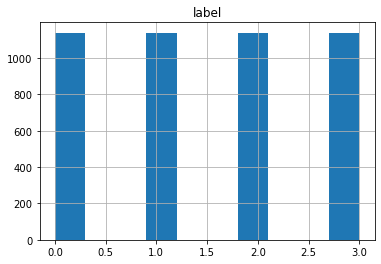

In [1]:
import pandas as pd

df_train = pd.read_json("../data/news_train.json", orient='records')

df_train.info()
df_train.hist()
df_train.head()

In [2]:
df_train.groupby(["label"]).count().index

Int64Index([0, 1, 2, 3], dtype='int64', name='label')

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

w_n_lemmatizer = WordNetLemmatizer() 

nltk.download("stopwords")
nltk.download('punkt')

stop_words = set(stopwords.words("english"))

df_train["text"] = df_train["text"].apply(lambda row: row.lower())
df_train["text"] = df_train["text"].apply(lambda row: " ".join([w_n_lemmatizer.lemmatize(word) for word in word_tokenize(row) if not word in stop_words and word.isalpha()]))

df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/username/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/username/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,label_name
0,organization petroleum exporting country agree...,0,Business
1,american business tycoon malcolm glazer increa...,2,Sports
2,new york reuters international business machin...,1,SciTech
3,unilever world largest maker food soap cut ear...,0,Business
4,australia nathan baggaley moon winning silver ...,2,Sports


In [4]:
# pip install spacy

In [5]:
import sys
print(sys.executable)

/anaconda/envs/py37_default/bin/python


In [6]:
import spacy

nlp = spacy.load('en_core_web_lg')

## Text vectorizing with embedding word vectors

In [7]:
import numpy as np

vectors = []

for item in df_train["text"].values:
    doc = nlp(item)
    tmp = [word.vector for word in doc]
    count = len(tmp)
    vectors.append(sum(tmp) / count)

vectors = np.array(vectors)

len(vectors)

4560

In [8]:
maxK=21
step=1
K = range(2, maxK, step)

Completed clustering:  2
Completed clustering:  3
Completed clustering:  4
Completed clustering:  5
Completed clustering:  6
Completed clustering:  7
Completed clustering:  8
Completed clustering:  9
Completed clustering:  10
Completed clustering:  11
Completed clustering:  12
Completed clustering:  13
Completed clustering:  14
Completed clustering:  15
Completed clustering:  16
Completed clustering:  17
Completed clustering:  18
Completed clustering:  19
Completed clustering:  20


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

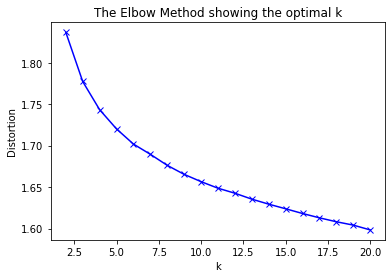

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, verbose=0)
    kmeanModel.fit(vectors)
    distortions.append(sum(np.min(cdist(vectors, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / vectors.shape[0])
    print("Completed clustering: ", k)
    
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [12]:
# pip install yellowbrick

     |████████████████████████████████| 271 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 14.0 MB/s eta 0:00:01     |████████████████████████▊       | 11.4 MB 14.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.5 requires setuptools-git>=1.2, which is not installed.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


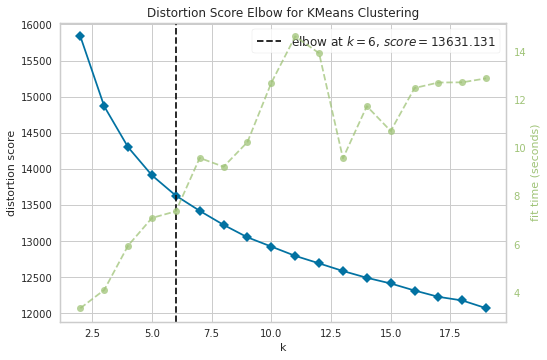

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=range(2, 20, 1), metric="distortion")
visualizer.fit(vectors)
visualizer.show()

In [14]:
visualizer.elbow_value_

6

In [15]:
optimal_cluster_naumber_300 = visualizer.elbow_value_
clusterer = KMeans(n_clusters=optimal_cluster_naumber_300)
cluster_labels = clusterer.fit_predict(vectors)
len(cluster_labels)

4560

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_300 = tsne.fit_transform(vectors)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4560 samples in 0.304s...
[t-SNE] Computed neighbors for 4560 samples in 30.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4560
[t-SNE] Computed conditional probabilities for sample 2000 / 4560
[t-SNE] Computed conditional probabilities for sample 3000 / 4560
[t-SNE] Computed conditional probabilities for sample 4000 / 4560
[t-SNE] Computed conditional probabilities for sample 4560 / 4560
[t-SNE] Mean sigma: 0.569314
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.819901
[t-SNE] KL divergence after 300 iterations: 2.357946


In [17]:
df_train["tsne-1d"] = tsne_300[:,0]
df_train["tsne-2d"] = tsne_300[:,1]

df_train.head(5)

,text,label,label_name,tsne-1d,tsne-2d
0,organization petroleum exporting country agree...,0,Business,9.229559,-4.937326
1,american business tycoon malcolm glazer increa...,2,Sports,-5.120850,-0.146133
2,new york reuters international business machin...,1,SciTech,2.326975,5.481955
3,unilever world largest maker food soap cut ear...,0,Business,10.802154,-0.403350
4,australia nathan baggaley moon winning silver ...,2,Sports,-8.794710,0.029509


In [19]:
# pip install seaborn

     |████████████████████████████████| 285 kB 11.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='tsne-1d', ylabel='tsne-2d'>

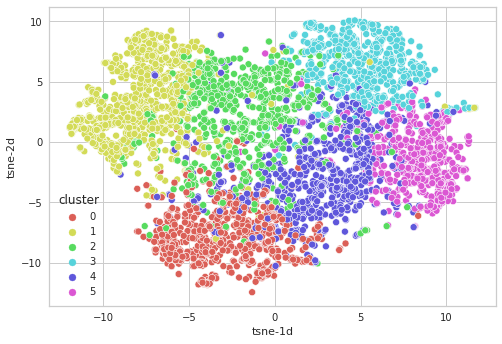

In [20]:
import seaborn as sns

df_train['cluster'] = cluster_labels

sns.scatterplot(data=df_train,
                hue="cluster",
                palette=sns.color_palette("hls", optimal_cluster_naumber_300),
                x="tsne-1d", 
                y="tsne-2d")

In [21]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(vectors)

print("Cumulative variation for 2 principal components: ", np.sum(pca_2.explained_variance_ratio_))

Cumulative variation for 2 principal components:  0.21231768


In [22]:
df_train["pca-1d"] = pca_2_result[:,0]
df_train["pca-2d"] = pca_2_result[:,1]

df_train.head()

,text,label,label_name,tsne-1d,tsne-2d,cluster,pca-1d,pca-2d
0,organization petroleum exporting country agree...,0,Business,9.229559,-4.937326,5,1.229193,0.266932
1,american business tycoon malcolm glazer increa...,2,Sports,-5.120850,-0.146133,5,-0.049246,-0.162172
2,new york reuters international business machin...,1,SciTech,2.326975,5.481955,2,0.345075,-0.362793
3,unilever world largest maker food soap cut ear...,0,Business,10.802154,-0.403350,5,0.446660,-0.465869
4,australia nathan baggaley moon winning silver ...,2,Sports,-8.794710,0.029509,1,-0.665306,-0.594285


<AxesSubplot:xlabel='pca-1d', ylabel='pca-2d'>

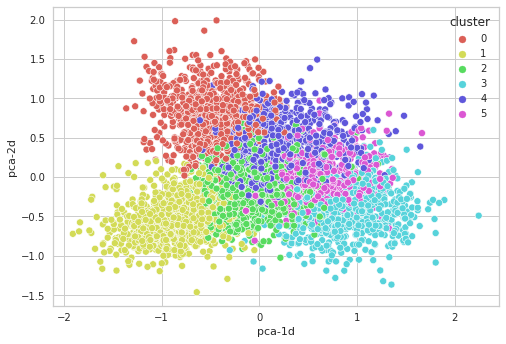

In [23]:
sns.scatterplot(data=df_train,
                hue="cluster",
                palette=sns.color_palette("hls", optimal_cluster_naumber_300),
                x="pca-1d", 
                y="pca-2d")

In [29]:
def vis_evr(evr, x_min=0, x_max=800, x_step=50, y_min = 0, y_max=1., y_step=0.1):
  fig = plt.figure()
  ax = fig.gca()
  ax.set_xticks(np.arange(x_min, x_max, x_step))
  ax.set_yticks(np.arange(y_min, y_max, y_step))
  plt.plot(evr)
  plt.grid(linestyle='-', linewidth=1)


  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance');

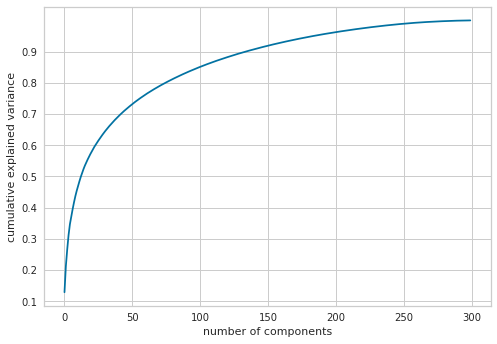

In [30]:
pca = PCA().fit(vectors)
evr = np.cumsum(pca.explained_variance_ratio_)

vis_evr(evr)

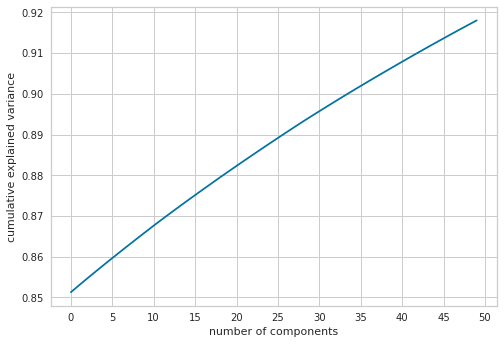

In [31]:
vis_evr(evr[100:150], x_max=150, x_step=5, y_step=0.01)

In [32]:
pca_n = PCA(n_components=140)
pca_n_result = pca_n.fit_transform(vectors)

print("Cumulative variation for 140 principal components: ", np.sum(pca_n.explained_variance_ratio_))

Cumulative variation for 140 principal components:  0.90533173


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1520 non-null   object
 1   label       1520 non-null   int64 
 2   label_name  1520 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.8+ KB


,text,label,label_name
0,While rivals scramble to catch up on the deskt...,1,SciTech
1,AP - UCLA soccer coach Jillian Ellis was happy...,2,Sports
2,PCI Express allows Nvidia to tap into system m...,1,SciTech
3,AP - The Federal Election Commission on Thursd...,3,World
4,City officials hope there are people willing t...,1,SciTech


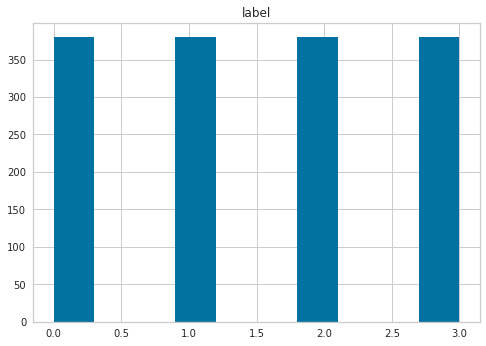

In [33]:
df_test = pd.read_json("../data/news_test.json", orient='records')

df_test.info()
df_test.hist()
df_test.head()

In [34]:
df_test["text"] = df_test["text"].apply(lambda row: row.lower())
df_test["text"] = df_test["text"].apply(lambda row: " ".join([w_n_lemmatizer.lemmatize(word) for word in word_tokenize(row) if not word in stop_words and word.isalpha()]))

vectors_test = []

for item in df_test["text"].values:
    doc = nlp(item)
    tmp = [word.vector for word in doc]
    count = len(tmp)
    vectors_test.append(sum(tmp) / count)

vectors_test = np.array(vectors_test)

# Predicition

In [45]:
clusterer_test = KMeans(n_clusters=4)
clusterer_test.fit(vectors)

df_test["vectors"] = list(vectors_test)
df_test["cluster"] = clusterer_test.predict(vectors_test)
df_test.head(10)

,text,label,label_name,vectors,cluster,transform_cluster
0,rival scramble catch desktop google plan digit...,1,SciTech,"[-0.06799412, -0.15074979, -0.06901913, 0.0561...",3,1
1,ap ucla soccer coach jillian elli happy beat b...,2,Sports,"[-0.032348, 0.2401684, 0.04220011, -0.01810310...",2,2
2,pci express allows nvidia tap system memory sa...,1,SciTech,"[-0.1490572, 0.14119959, 0.1525, -0.09348633, ...",3,1
3,ap federal election commission thursday electe...,3,World,"[-0.058893386, 0.0013876195, 0.23308098, 0.055...",1,2
4,city official hope people willing pay plenty m...,1,SciTech,"[-0.11631947, -0.05148354, 0.05605192, -0.1396...",2,2
5,kiev reuters ukrainian prime minister viktor y...,3,World,"[-0.08165423, 0.06296459, 0.24556233, 0.122360...",1,2
6,afp french auto giant renault sa said invest m...,3,World,"[-0.12092522, 0.10596063, 0.12694141, -0.05623...",0,3
7,buffalo bill offensive coordinator tom clement...,2,Sports,"[-0.08358218, 0.07205588, -0.03815619, 0.10789...",2,2
8,billion drug industry stumbling badly core bus...,3,World,"[-0.14198835, 0.16291378, -0.011415428, -0.124...",0,3
9,google launched google scholar search service ...,1,SciTech,"[-0.17481285, -0.10522819, -0.08182489, 0.1493...",3,1


In [46]:
df_test["transform_cluster"] = [-1] * len(df_test["cluster"])
df_test.head(2)

,text,label,label_name,vectors,cluster,transform_cluster
0,rival scramble catch desktop google plan digit...,1,SciTech,"[-0.06799412, -0.15074979, -0.06901913, 0.0561...",3,-1
1,ap ucla soccer coach jillian elli happy beat b...,2,Sports,"[-0.032348, 0.2401684, 0.04220011, -0.01810310...",2,-1


In [47]:
def replace_value(cluster_value,transform_cluster, df):
    for i in range(len(df_test["cluster"])): 
        if df["cluster"].values[i] == cluster_value: 
            df["transform_cluster"].values[i]=transform_cluster

replace_value(3,1,df_test)
replace_value(2,2,df_test)
replace_value(1,3,df_test)
replace_value(0,0,df_test)

In [48]:
df_test.head(5)

,text,label,label_name,vectors,cluster,transform_cluster
0,rival scramble catch desktop google plan digit...,1,SciTech,"[-0.06799412, -0.15074979, -0.06901913, 0.0561...",3,1
1,ap ucla soccer coach jillian elli happy beat b...,2,Sports,"[-0.032348, 0.2401684, 0.04220011, -0.01810310...",2,2
2,pci express allows nvidia tap system memory sa...,1,SciTech,"[-0.1490572, 0.14119959, 0.1525, -0.09348633, ...",3,1
3,ap federal election commission thursday electe...,3,World,"[-0.058893386, 0.0013876195, 0.23308098, 0.055...",1,3
4,city official hope people willing pay plenty m...,1,SciTech,"[-0.11631947, -0.05148354, 0.05605192, -0.1396...",2,2


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print("MSE:", mean_squared_error(df_test["label"].values, df_test["transform_cluster"].values))
print("ACC:", accuracy_score(df_test["label"].values, df_test["transform_cluster"].values))

MSE: 0.6552631578947369
ACC: 0.7960526315789473
